In [11]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 

In [12]:
crime = pd.read_csv(r"C:\Users\User\Desktop\data\crime-investigation\crimes.csv")

In [13]:
crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [14]:
crime.shape

(185715, 12)

In [15]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DR_NO         185715 non-null  int64 
 1   Date Rptd     185715 non-null  object
 2   DATE OCC      185715 non-null  object
 3   TIME OCC      185715 non-null  int64 
 4   AREA NAME     185715 non-null  object
 5   Crm Cd Desc   185715 non-null  object
 6   Vict Age      185715 non-null  int64 
 7   Vict Sex      185704 non-null  object
 8   Vict Descent  185705 non-null  object
 9   Weapon Desc   73502 non-null   object
 10  Status Desc   185715 non-null  object
 11  LOCATION      185715 non-null  object
dtypes: int64(3), object(9)
memory usage: 17.0+ MB


In [16]:
crime["Weapon Desc"].isna().sum()

np.int64(112213)

In [17]:
crime["Weapon Desc"] = crime["Weapon Desc"].fillna("none", inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_28724\2256841223.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  crime["Weapon Desc"] = crime["Weapon Desc"].fillna("none", inplace = True)


In [18]:
crime["Weapon Desc"]

0         None
1         None
2         None
3         None
4         None
          ... 
185710    None
185711    None
185712    None
185713    None
185714    None
Name: Weapon Desc, Length: 185715, dtype: object

In [19]:
crime["Weapon Desc"].isna().sum()

np.int64(185715)

In [20]:
crime.groupby("Crm Cd Desc")["Vict Sex"].value_counts()

Crm Cd Desc                                   Vict Sex
ARSON                                         M           190
                                              F           135
                                              X             9
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER  M            32
                                              X            27
                                                         ... 
VIOLATION OF TEMPORARY RESTRAINING ORDER      M            59
                                              X             2
WEAPONS POSSESSION/BOMBING                    M             3
                                              F             2
                                              X             1
Name: count, Length: 271, dtype: int64

<Axes: xlabel='Vict Sex'>

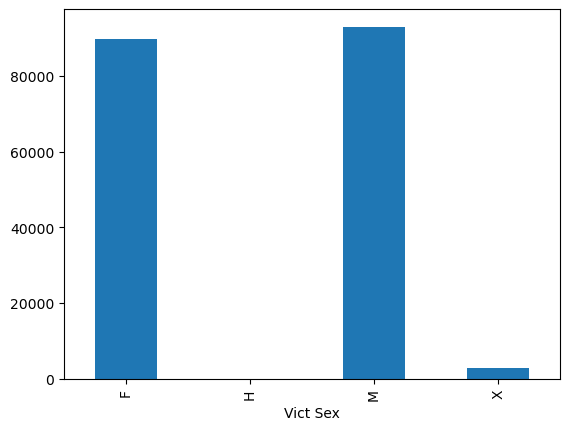

In [21]:
crime["Vict Sex"].value_counts()
crime["Vict Sex"].value_counts().sort_index().plot(kind="bar")

In [22]:
#most common crime against females 
f_crime = crime[crime["Vict Sex"] == "F"]
f_crime["Crm Cd Desc"].value_counts()

Crm Cd Desc
THEFT OF IDENTITY                               14426
BATTERY - SIMPLE ASSAULT                         9199
INTIMATE PARTNER - SIMPLE ASSAULT                9126
BURGLARY FROM VEHICLE                            5829
THEFT PLAIN - PETTY ($950 & UNDER)               5314
                                                ...  
BIGAMY                                              1
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER        1
DISHONEST EMPLOYEE - PETTY THEFT                    1
TILL TAP - GRAND THEFT ($950.01 & OVER)             1
THEFT, COIN MACHINE - PETTY ($950 & UNDER)          1
Name: count, Length: 96, dtype: int64

In [23]:
crime["Crm Cd Desc"].value_counts()

Crm Cd Desc
THEFT OF IDENTITY                                 22670
BATTERY - SIMPLE ASSAULT                          19694
BURGLARY FROM VEHICLE                             13799
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    13215
INTIMATE PARTNER - SIMPLE ASSAULT                 11981
                                                  ...  
BRIBERY                                               1
GRAND THEFT / INSURANCE FRAUD                         1
TILL TAP - GRAND THEFT ($950.01 & OVER)               1
DISHONEST EMPLOYEE ATTEMPTED THEFT                    1
LYNCHING                                              1
Name: count, Length: 104, dtype: int64

In [24]:
crime["Status Desc"].value_counts()

Status Desc
Invest Cont     153790
Adult Other      17722
Adult Arrest     13397
Juv Arrest         492
Juv Other          312
UNK                  2
Name: count, dtype: int64

In [25]:
# Convert date columns
crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,None,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,None,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,None,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,None,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,900,Rampart,THEFT OF IDENTITY,79,M,B,None,Invest Cont,1200 W 7TH ST


In [26]:
crime["DATE OCC"] = pd.to_datetime(crime["DATE OCC"] , errors = "coerce")
crime["Date Rptd"] = pd.to_datetime(crime["Date Rptd"] , errors = "coerce")

In [27]:
# Extract hour from TIME OCC (e.g., 1230 → 12)
crime["Hour"] = (crime["TIME OCC"] // 100).astype(int)

In [28]:
crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,Hour
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,None,Invest Cont,2500 S SYCAMORE AV,11
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,None,Invest Cont,3300 SAN MARINO ST,16
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,None,Invest Cont,1900 TRANSIENT,12
3,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,None,Invest Cont,6200 4TH AV,6
4,220213256,2022-07-14,2020-07-14,900,Rampart,THEFT OF IDENTITY,79,M,B,None,Invest Cont,1200 W 7TH ST,9


In [29]:
#Area 
crime["AREA NAME"].value_counts().head(10)

AREA NAME
Central        14944
Southwest      11945
77th Street    11739
Pacific         9923
Hollywood       9762
Southeast       9571
Olympic         9414
Newton          9152
Van Nuys        8621
N Hollywood     8502
Name: count, dtype: int64

In [30]:
crime["Hour"].value_counts().head(10)

Hour
12    13663
18    10125
17     9964
20     9579
15     9393
19     9262
16     9224
14     8872
11     8787
0      8728
Name: count, dtype: int64

In [32]:
# Extract time features
crime["Year"] = crime["DATE OCC"].dt.year
crime["Month"] = crime["DATE OCC"].dt.month
crime["Day"] = crime["DATE OCC"].dt.day
crime["DayoftheWeek"] = crime["DATE OCC"].dt.day_name()

In [33]:
crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,Hour,Year,Month,Day,DayoftheWeek
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,None,Invest Cont,2500 S SYCAMORE AV,11,2020,5,12,Tuesday
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,None,Invest Cont,3300 SAN MARINO ST,16,2020,6,4,Thursday
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,None,Invest Cont,1900 TRANSIENT,12,2020,8,17,Monday
3,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,None,Invest Cont,6200 4TH AV,6,2020,1,27,Monday
4,220213256,2022-07-14,2020-07-14,900,Rampart,THEFT OF IDENTITY,79,M,B,None,Invest Cont,1200 W 7TH ST,9,2020,7,14,Tuesday


In [34]:
crime.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
DR_NO,185715.0,NaN,NaN,NaN,225578132.110174,200907217.0,221010755.5,222011410.0,231004407.5,239909747.0,5017437.992076
Date Rptd,185715,NaN,NaN,NaN,2022-12-12 01:50:25.325902848,2022-06-01 00:00:00,2022-09-04 00:00:00,2022-12-10 00:00:00,2023-03-20 00:00:00,2023-07-03 00:00:00,NaN
DATE OCC,185715,NaN,NaN,NaN,2022-11-27 19:04:55.711170560,2020-01-01 00:00:00,2022-08-25 00:00:00,2022-12-02 00:00:00,2023-03-12 00:00:00,2023-07-03 00:00:00,NaN
TIME OCC,185715.0,NaN,NaN,NaN,1300.024414,1.0,830.0,1340.0,1830.0,2359.0,655.753163
AREA NAME,185715,21,Central,14944,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crm Cd Desc,185715,104,THEFT OF IDENTITY,22670,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vict Age,185715.0,NaN,NaN,NaN,39.999257,2.0,28.0,37.0,50.0,99.0,15.450227
Vict Sex,185704,4,M,93008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vict Descent,185705,20,H,74128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weapon Desc,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: title={'center': 'crime by year'}, xlabel='Year'>

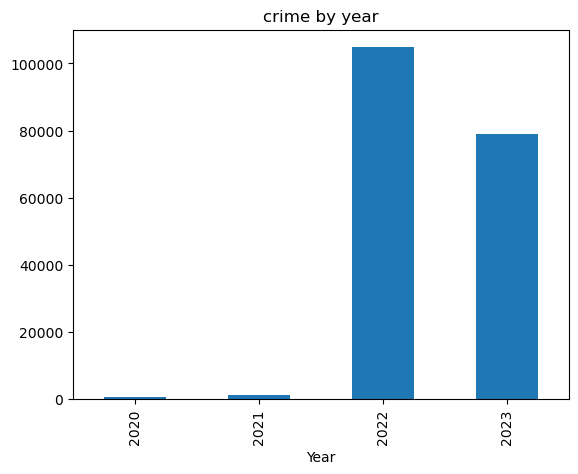

In [35]:
#Crime Trend Over Time
#Shows whether crime is increasing or decreasing
crime.groupby("Year")["DR_NO"].count().plot(kind="bar" , title = "crime by year")

<Axes: title={'center': 'crime by year'}, xlabel='Month'>

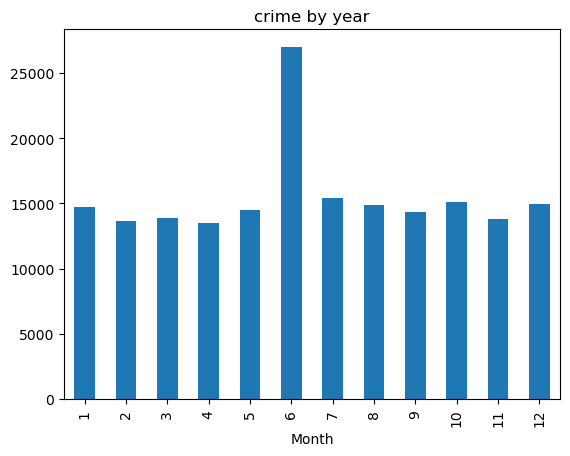

In [36]:
crime.groupby("Month")["DR_NO"].count().plot(kind="bar" , title = "crime by year")

<Axes: title={'center': 'crime by year'}, xlabel='Day'>

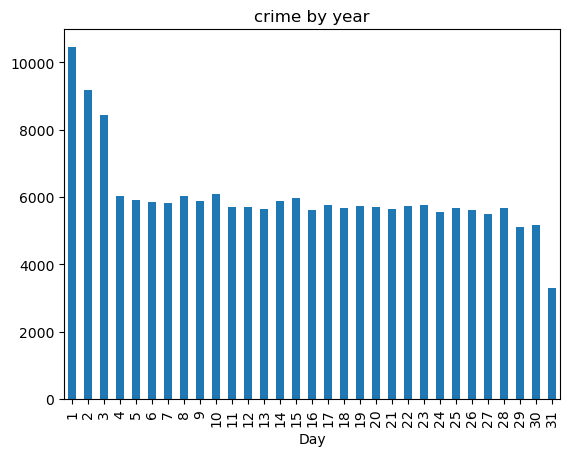

In [37]:
crime.groupby("Day")["DR_NO"].count().plot(kind="bar" , title = "crime by year")

<Axes: title={'center': 'crime by year'}, xlabel='DayoftheWeek'>

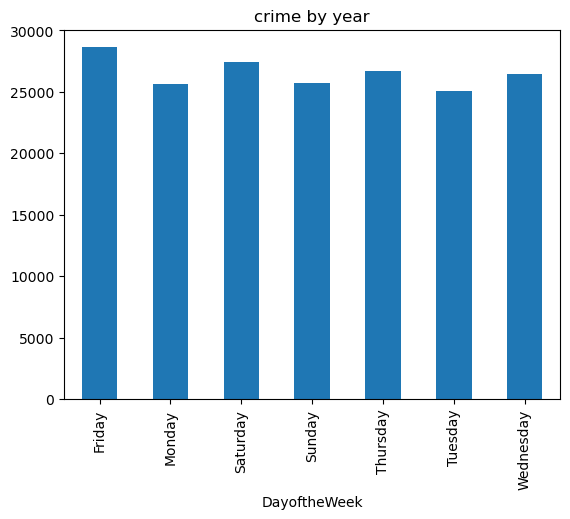

In [38]:
crime.groupby("DayoftheWeek")["DR_NO"].count().plot(kind="bar" , title = "crime by year")

<Axes: xlabel='Hour'>

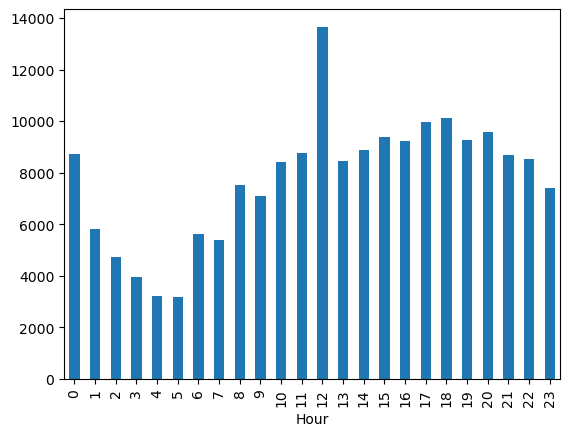

In [39]:
crime["Hour"].value_counts().sort_index().plot(kind="bar")

<Axes: ylabel='AREA NAME'>

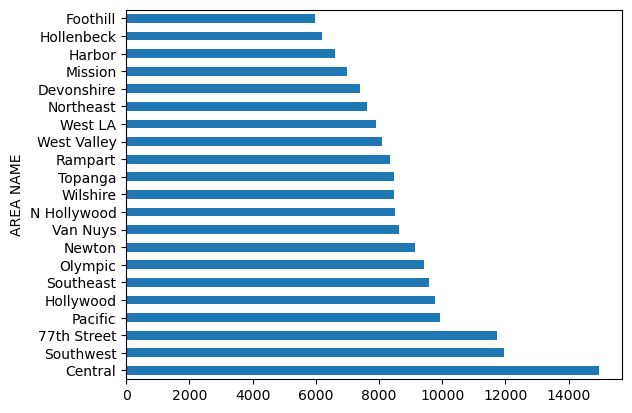

In [40]:
#Top Crime Areas
crime["AREA NAME"].value_counts().plot(kind = "barh")

<Axes: title={'center': 'victim gender distribution'}, ylabel='proportion'>

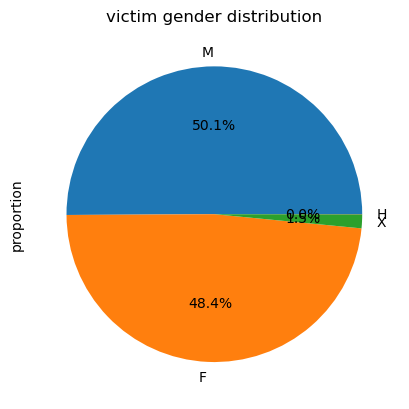

In [41]:
crime["Vict Sex"].value_counts(normalize = True).plot(kind = "pie" , title = "victim gender distribution" , autopct = "%1.1f%%")

<Axes: title={'center': 'Victim Descent'}, xlabel='Vict Descent'>

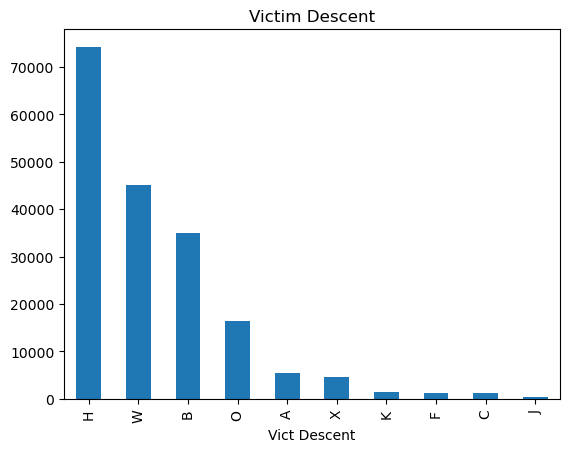

In [42]:
crime["Vict Descent"].value_counts().head(10).plot(kind="bar", title="Victim Descent")

<Axes: ylabel='Frequency'>

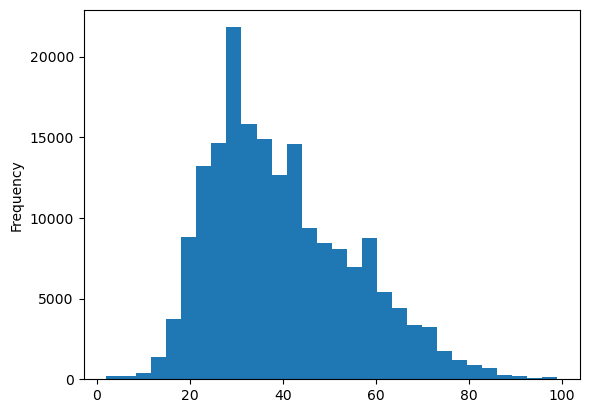

In [43]:
#Age Distribution
crime["Vict Age"].plot(kind = "hist" ,bins = 30) 

<Axes: title={'center': 'Case Status Summary'}, xlabel='Status Desc'>

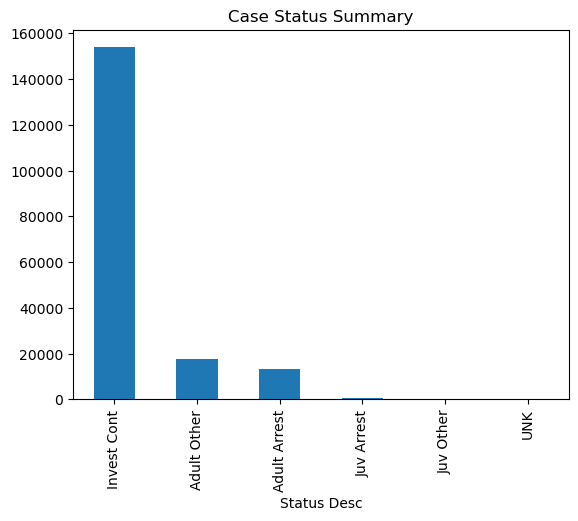

In [46]:
crime["Status Desc"].value_counts().plot(kind="bar", title="Case Status Summary")

In [47]:
#Combined Insights
#Top Crime Types by Area
crime.groupby("AREA NAME")["Crm Cd Desc"].value_counts()

AREA NAME    Crm Cd Desc                                     
77th Street  THEFT OF IDENTITY                                   1977
             ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT      1344
             BATTERY - SIMPLE ASSAULT                            1216
             INTIMATE PARTNER - SIMPLE ASSAULT                   1002
             ROBBERY                                              795
                                                                 ... 
Wilshire     RECKLESS DRIVING                                       1
             RESISTING ARREST                                       1
             SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT       1
             THEFT PLAIN - ATTEMPT                                  1
             VEHICLE - STOLEN                                       1
Name: count, Length: 1503, dtype: int64

In [ ]:
crime.head()

In [48]:
pd.crosstab(crime["AREA NAME"], crime["Crm Cd Desc"]).apply(lambda x: x/x.sum(), axis=1).head(10)

Crm Cd Desc,ARSON,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",ATTEMPTED ROBBERY,BATTERY - SIMPLE ASSAULT,BATTERY ON A FIREFIGHTER,BATTERY POLICE (SIMPLE),BIGAMY,BIKE - STOLEN,BLOCKING DOOR INDUCTION CENTER,...,UNAUTHORIZED COMPUTER ACCESS,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",VANDALISM - MISDEAMEANOR ($399 OR UNDER),VEHICLE - ATTEMPT STOLEN,VEHICLE - STOLEN,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",VIOLATION OF COURT ORDER,VIOLATION OF RESTRAINING ORDER,VIOLATION OF TEMPORARY RESTRAINING ORDER,WEAPONS POSSESSION/BOMBING
AREA NAME,,,,,,,,,,,,,,,,,,,,,
77th Street,0.002470,0.000000,0.114490,0.007411,0.103586,0.000085,0.000852,0.000000,0.000767,0.0,...,0.000341,0.053923,0.023171,0.004770,0.000767,0.000000,0.005111,0.017634,0.000341,0.000000
Central,0.000937,0.000067,0.078292,0.007227,0.132227,0.000535,0.001138,0.000000,0.011041,0.0,...,0.000134,0.049920,0.015658,0.002275,0.000468,0.001338,0.001874,0.004350,0.000134,0.000000
Devonshire,0.001079,0.000000,0.047227,0.003508,0.100391,0.000540,0.000945,0.000000,0.004858,0.0,...,0.000540,0.044393,0.017676,0.002294,0.000135,0.000000,0.012009,0.012684,0.006612,0.000000
Foothill,0.003176,0.000000,0.070533,0.004346,0.103293,0.000167,0.000836,0.000000,0.001504,0.0,...,0.000501,0.059502,0.024402,0.001839,0.000334,0.000000,0.018051,0.023567,0.002173,0.000000
Harbor,0.001511,0.000000,0.079329,0.004684,0.117558,0.000000,0.000453,0.000000,0.003475,0.0,...,0.000151,0.059383,0.025839,0.009519,0.000302,0.000756,0.014506,0.044878,0.000604,0.000151
Hollenbeck,0.001938,0.001453,0.097691,0.006297,0.125464,0.000646,0.000323,0.000000,0.002422,0.0,...,0.000000,0.064751,0.033102,0.006136,0.000646,0.000000,0.011626,0.032779,0.001776,0.000000
Hollywood,0.000410,0.000000,0.069863,0.005941,0.130506,0.000102,0.000102,0.000000,0.007785,0.0,...,0.000615,0.055931,0.016697,0.002254,0.000102,0.000717,0.006146,0.013829,0.000615,0.000000
Mission,0.001574,0.000715,0.064378,0.006009,0.095851,0.000286,0.000429,0.000000,0.002575,0.0,...,0.000286,0.061660,0.022461,0.001717,0.000286,0.000000,0.016881,0.032761,0.001288,0.000000
N Hollywood,0.002940,0.000000,0.055634,0.004117,0.095272,0.000118,0.000353,0.000000,0.008939,0.0,...,0.000353,0.068690,0.019407,0.003293,0.000470,0.000706,0.001411,0.001764,0.000470,0.000118


In [49]:
pd.crosstab(crime["Hour"], crime["Crm Cd Desc"]).idxmax(axis=1)

Hour
0                                     THEFT OF IDENTITY
1                                     THEFT OF IDENTITY
2        ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
3     THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...
4     THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...
5     THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...
6                                     THEFT OF IDENTITY
7                                     THEFT OF IDENTITY
8                                     THEFT OF IDENTITY
9                                     THEFT OF IDENTITY
10                                    THEFT OF IDENTITY
11                             BATTERY - SIMPLE ASSAULT
12                                    THEFT OF IDENTITY
13                             BATTERY - SIMPLE ASSAULT
14                             BATTERY - SIMPLE ASSAULT
15                             BATTERY - SIMPLE ASSAULT
16                             BATTERY - SIMPLE ASSAULT
17                             BATTERY - SI

In [50]:
crime.groupby("Crm Cd Desc")["Vict Age"].mean().sort_values(ascending=False).head(10)

Crm Cd Desc
PURSE SNATCHING - ATTEMPT                               62.500000
DISRUPT SCHOOL                                          62.000000
GRAND THEFT / INSURANCE FRAUD                           62.000000
DISHONEST EMPLOYEE ATTEMPTED THEFT                      60.000000
DOCUMENT FORGERY / STOLEN FELONY                        53.696011
TELEPHONE PROPERTY - DAMAGE                             51.666667
BLOCKING DOOR INDUCTION CENTER                          51.250000
BRIBERY                                                 51.000000
DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01    50.666667
LYNCHING                                                50.000000
Name: Vict Age, dtype: float64

<Axes: >

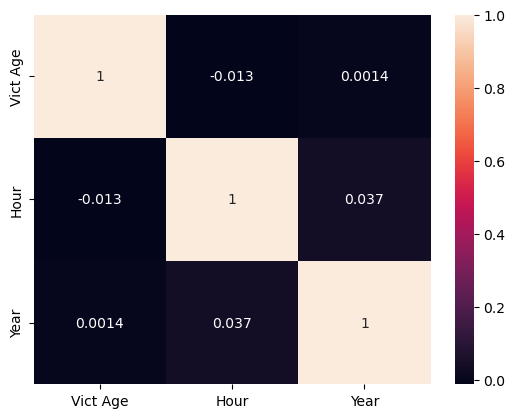

In [51]:
#Correlation & Patterns
crime[["Vict Age" , "Hour" , "Year"]].corr()
sns.heatmap(crime[["Vict Age" , "Hour" , "Year"]].corr(), annot = True)

<Axes: xlabel='Year'>

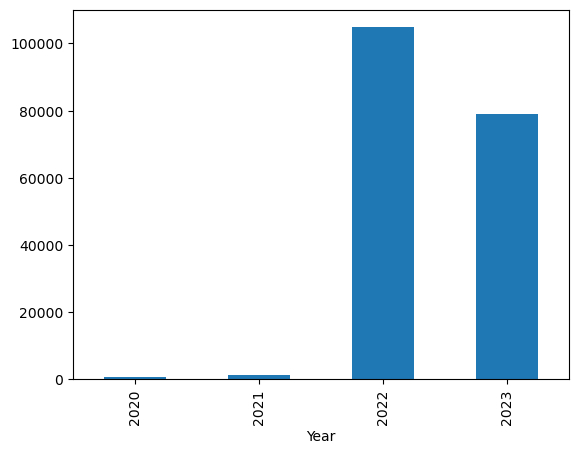

In [52]:
# Crimes per year
crimes_per_year = crime.groupby("Year")["DR_NO"].count()
crimes_per_year.plot(kind="bar")



<Axes: xlabel='Month'>

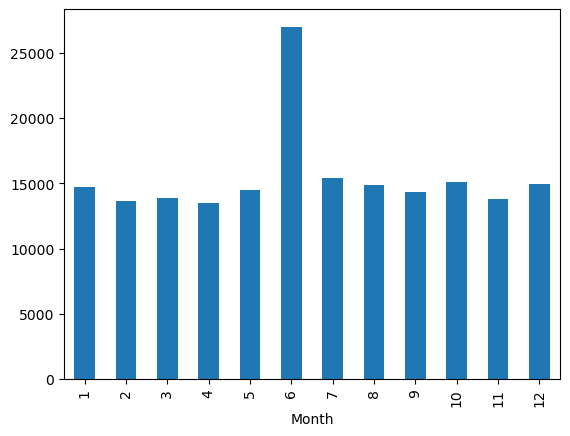

In [53]:
# Crimes per month
crimes_per_month = crime.groupby("Month")["DR_NO"].count()
crimes_per_month.plot(kind="bar")

<Axes: xlabel='Hour'>

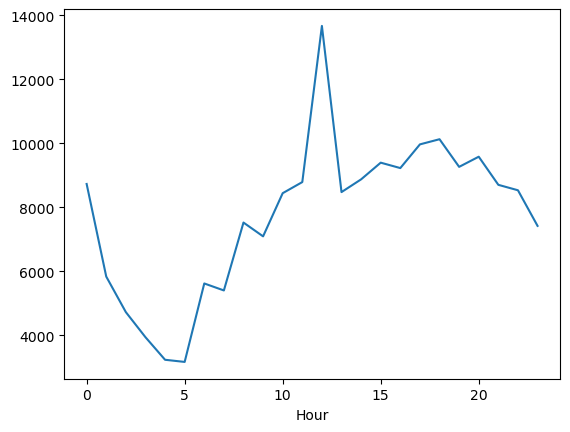

In [54]:
crime.groupby("Hour")["DR_NO"].count().plot(kind="line")

In [ ]:
crime.head()

In [ ]:
#what is the most dangers month for women 
f_crime.head()

In [55]:
f_crime["Month"] = pd.to_datetime(f_crime["DATE OCC"], errors="coerce").dt.month


C:\Users\User\AppData\Local\Temp\ipykernel_28724\4120766229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_crime["Month"] = pd.to_datetime(f_crime["DATE OCC"], errors="coerce").dt.month


In [ ]:
f_crime.head()

In [56]:
crimes_by_month = f_crime["Month"].value_counts().sort_index()

In [ ]:
month_map = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}
crimes_by_month.index = crimes_by_month.index.map(month_map)

In [57]:
most_dangerous_month = crimes_by_month.idxmax()
most_dangerous_count = crimes_by_month.max()
print(f"The most dangerous month for women is {most_dangerous_month} with {most_dangerous_count} reported crimes.")

The most dangerous month for women is 6 with 12890 reported crimes.


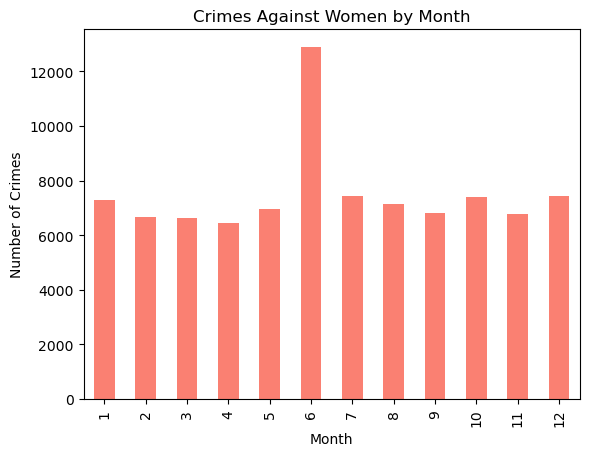

In [58]:
crimes_by_month.plot(kind="bar", color="salmon", title="Crimes Against Women by Month")
plt.ylabel("Number of Crimes")
plt.xlabel("Month")
plt.show()

In [ ]:
crime.head()

In [59]:
crime["Date Rptd"] = pd.to_datetime(crime["Date Rptd"], errors="coerce")

In [60]:
interval_betweem =( crime["Date Rptd"] - crime["DATE OCC"])

In [61]:
print(interval_betweem)

0         801 days
1         793 days
2         731 days
3        1127 days
4         730 days
            ...   
185710      4 days
185711      1 days
185712      0 days
185713      0 days
185714      0 days
Length: 185715, dtype: timedelta64[ns]
